## <font color=darkblue> NETWORK WITH THREE HIDDEN LAYERS COMBINED WITH POLYNOMIAL REGRESSION

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import vnns

<font color=darkblue> In this notebook, similar to the previous one, we are interested in networks with three hidden layers (such that hidden_units = 'auto', num_hidden_layers = 3, total_units_max = 30.) However, different than the previous notebooks, instead of setting polydeg = 1, we will set polydeg = 'auto'. What this does is, first a polynomial degree will be computed for no hidden units case and then the resulting dataset (with expanded number of features) will be modeled using a network with three hidden layers. In this new setup, because the number of nodes will increase in the input layer, for the same number of hidden layers, the number of connections and hence the theta matrix will be substantially bigger compared to the case without polynomial regression.

<font color=darkblue> Below we focus on the three remaining datasets (elliptic1, elliptic2, and complex2) whose scores had remained below our arbitrary threshold using zero, one, two, and three hidden layers (while polydeg = 1) in earlier notebooks:



*** Data: elliptic1 ***


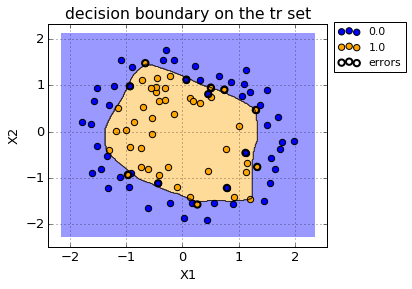

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic1,True,GD,1504,2.039912,2,"[9, 9, 9]",1.0,0.863,0.739




*** Data: elliptic2 ***


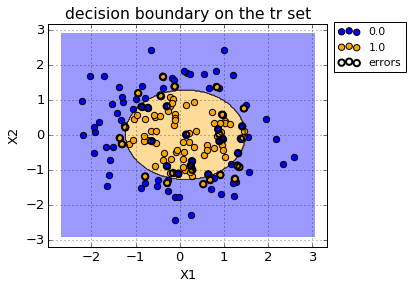

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic2,True,GD,131,0.041897,2,[],3.0,0.77,0.846




*** Data: complex2 ***


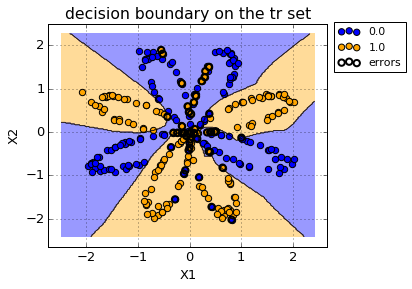

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex2,True,GD,312,0.445781,3,"[4, 4, 4]",3.0,0.857,0.772


In [3]:
for data in ['elliptic1','elliptic2','complex2']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True, 
                             polydeg = 'auto',
                             method = 'GD',                             
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = 'auto',
                             num_hidden_layers = 3, 
                             total_units_max = 30,
                             plot_output = True)
    summary = dla.generate_summary()
    display(summary)

<font color=darkblue> We note that the scores have improved for elliptic1 that combines a three-layer network ([9,9,9]) with a second degree polynomial regression compared to earlier attempts without polynomial regression. Although such a complex model for this relatively simple dataset is not justified (since hidden_units = [3,3] combined with polydeg = 1 had already done a decent job in NB02,) for the sake of example we run elliptic1 again below by turning on additional plots and report.

<font color=darkblue> Regarding the datasets elliptic2 and complex2, we do not observe a similar improvement in scores although the decision boundaries look decent. An interesting note here is that for elliptic2, after polydeg = 2 has been calculated, the script has returned no hidden layers instead of a three-layer network. This is because the candidate hidden units include, by design, not only the combinations set by parameter num_hidden_layers but also the case with no hidden layers. For this particular dataset of elliptic2 that uses a second degree polynomial expansion, it turns out,  hidden_units = [ ] ended up being a better model in terms of accuracy (vs. complexity) than any three-layer combinations. Indeed, polydeg = 2 alone does a quite acceptable job on elliptic2 and allowed to achieve scores very close to the previous best (obtained with hidden_units = [3] and polydeg = 1 in NB01.) Generally speaking, circular decision boundaries are more easily implemented with polynomial models that naturally fit them. In addition, such models allow to work with higher lamda values which tend to converge using a smaller number of iterations. 

<font color=darkblue> Model for dataset complex2, featuring hidden_units = [4,4,4] and polydeg = 2 looks visually decent however the associated scores are similar to those that were achieved using hidden_units = [4,4] and polydeg = 1 in NB02, hence would not be preferable due to its increased complexity.

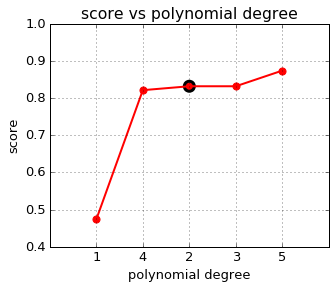

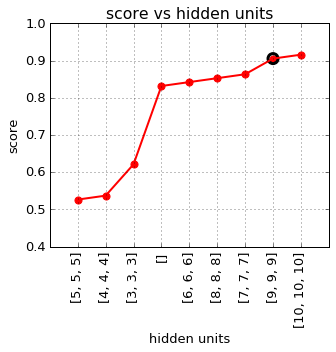

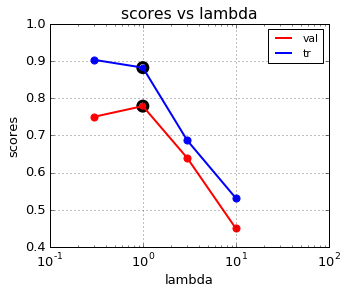

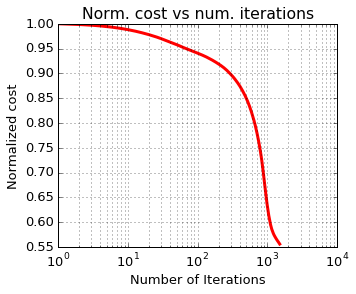


data:
	file: Data\Medium\elliptic1_tr.csv
	m = 95 training examples
	n = 5 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 51
	number of samples in class 1 = 44
solver:
	feature normalization: yes
	polynomial regression: yes (deg =  2)
	neural network config: [5, 9, 9, 9, 1]
	regularization: yes (lambda = 1.0)
	method: GD
	learning rate = 0.0243
output:
	* Converged
	initial cost = 0.455994992333
	final cost = 0.253461708631
	number of iterations = 1504
	accuracy on the training set: 0.863
	execution time:  2.302858  sec


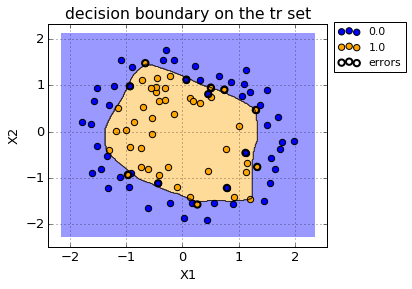

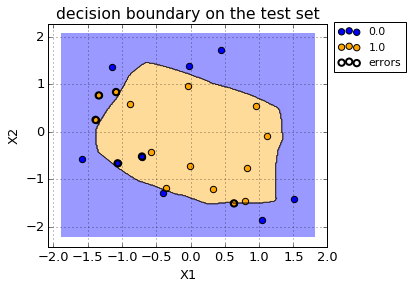

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic1,True,GD,1504,2.302858,2,"[9, 9, 9]",1.0,0.863,0.739


In [4]:
dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\elliptic1_tr.csv", 
                         normalize = True, 
                         polydeg = 'auto',
                         method = 'GD',                             
                         initialize = 'deep',
                         learning_rate= 'auto', 
                         lamda = 'auto',
                         maxiter = 10000, 
                         hidden_units = 'auto',
                         num_hidden_layers = 3, 
                         total_units_max = 30,
                         plot_J = True, 
                         report_summary = True, 
                         plot_output = True,
                         plot_test = True,
                         plot_poly = True,
                         plot_hidden = True,
                         plot_lam = True)        
summary = dla.generate_summary()
display(summary)

<font color=darkblue> In the five notebooks so far we have used gradient descent ('GD') to find the network parameters (theta). In the next notebook, we will have a look at the other algorithms available under scipy.optimize.minimize and see whether they present any advantages over our custom gradient-descent implementation. 